In [1]:
import numpy as np
import matplotlib.pyplot as plt
# %matplotlib notebook
%matplotlib widget
import pyobs

# Lecture 1

<font size="3">
   

\begin{equation}
\end{equation}

$\def\O{\mathcal O}$
$\def\Obar{\overline \O}$
$\def\tauexp{\tau_\mathrm{exp}}$
$\def\dObar{\delta \Obar}$
$\def\cov{\mathrm{cov}}$

## Definitions

We consider a stochastic process that returns $N$ (stochastic) estimators of $\O$ denoted by $\O(i)$, such that
\begin{equation}
    \Obar = \frac1N \sum_i \O(i)
\end{equation}
approximates/estimates the "true" value $\langle \O \rangle$.

 
Define the fluctuations 
\begin{equation}
    \delta \O(i) \equiv \O(i) - \langle \O \rangle \quad 
    \delta \Obar(i) = \O(i) - \Obar
\end{equation}

Define covariances with a slight abuse of notation
\begin{equation}
\cov(A, B) = \langle \big[A - \langle A \rangle \big]\big[B - \langle B \rangle \big] \rangle \,, \quad
\cov(A,A) = \cov(A)
\end{equation}


## Error

We want to quantify the error of $\Obar$. We start from
\begin{equation}
\langle [\Obar - \O] \rangle = \frac1N \sum_i \langle \delta \O(i) \rangle = \frac1N \sum_i \langle \O(i) \rangle - \langle \O \rangle
\end{equation}
**Proposition 1)**: invariance under translations of the index $i$, namely $\langle \O(i) \rangle = \langle \O(0) \rangle = \langle \O \rangle$.

Using Proposition 1 we obtain $\langle [\Obar - \O] \rangle = 0$, i.e. the estimator $\Obar$ is unbiased.

Let us move to the squared distance between $\Obar$ and $\O$, which defines its error
\begin{align}
\label{e:error}
\cov(\Obar) = \langle [\Obar - \O]^2 \rangle & = \frac{1}{N^2} \sum_{i,j} \langle \delta \O(i) \delta \O(j) \rangle  \\
                               & = \frac{1}{N^2} \sum_{i,j} \langle \delta \O(|i-j|) \delta \O(0) \rangle \\
                               & = \frac{1}{N^2} \sum_{i,j} \Gamma(i-j)
\label{e:Gamma}
\end{align}
where we introduced the **(auto)correlation function** $\Gamma(t) = \Gamma(-t)$, thanks to Proposition 1 for the two-point function $\langle \O(i) \O(j) \rangle = \langle \O(|i-j|) \O(0) \rangle$.

**Proposition 2)**: assume the presence of a gap denoted by $\tauexp$ such that $\Gamma(t) \overset{t \gg 0}{\propto} e^{-t/\tauexp}$.
  - note that $\tauexp$ has the same dimensions as the index $i$.
  
Thanks to the exponential convergence of $\Gamma$ at large $t$ we can integrate it, thus defining
\begin{equation}
C = \sum_{t=-\infty}^\infty \Gamma(t)
\end{equation}

**Proposition 3.a)**: impose open boundary conditions for the sequence $\O(i)$, $\O(i) = 0 \ \forall i<0, i>N-1$

**Proposition 3.b)**: impose periodic boundary conditions for the sequence $\O(i)$, $\O(i) = \O(i+N)$

Using Proposition 3.b
\begin{equation}
\sum_{i,j} \langle \O(i) \O(j) \rangle = N \sum_{t=-(N-1)}^{N-1} \langle \O(t) \O(0) \rangle \quad 
\end{equation}
Hence with periodic boundary conditions the error becomes
\begin{align}
\langle [\Obar - \O]^2 \rangle & = \frac{1}{N^2} \sum_{i,j} \langle \delta \O(i) \delta \O(j) \rangle \\
                               & = \frac1N \sum_{t=-(N-1)}^{N-1} \Gamma(t) \\
                               & = \frac1N \Bigg\{ \sum_{t=-\infty}^{\infty} \Gamma(t) + \mathrm{O} \Big( e^{-N/\tauexp} \Big) \Bigg\} \simeq \frac1N C
\end{align}

Using Proposition 3.a (open BC) we calculate
\begin{equation}
\sum_{i,j} \langle \O(i) \O(j) \rangle = \sum_{t=-(N-1)}^{N-1} (N-t) \langle \O(t) \O(0) \rangle \quad 
\end{equation}
and we use this result to arrive at
\begin{align}
\cov(\Obar) = \langle [\Obar - \O]^2 \rangle & = \frac{1}{N^2} \sum_{i,j} \langle \delta \O(i) \delta \O(j) \rangle \\
                               & \simeq \frac1N C \Big[ 1 + \mathrm{O} \big( \tauexp/N \big) \Big]
\end{align}

<font size="3">
    
# Analysis strategies

Let us consider the case of a two-point correlator evaluated at source location $x$ and with distance $|x-y|$. The (fixed) distance is part of our definition of the observable $\O$. 
    
## Monte Carlo Markov chains

 1. generate a sequence of field configurations $\phi^1 \to \phi^2 \to \cdots \phi^N$
    * the index $i$ takes the role of __configuration index__ or __Monte Carlo time__
      - we may either average over the source location or keep it fixed
    * it follows that $\O(i) = \O[\phi^i]$, $N$ is the number of configurations
 2. detailed balance implies a symmetric Markov matrix $\to$ Proposition 1 satisfied
 3. in general Proposition 2 is also satisfied
 4. by construction, Proposition 3.a holds (it's a sequence with a start and an end!)

    
With Monte Carlo analysis $C$ can be related to the so-called the integrated autocorrelation time
\begin{equation}
\tau_\mathrm{int} = \frac 12 + \sum_{t=1} \frac{\Gamma(t)}{\Gamma(0)} \,, \quad \sigma_{\Obar}^2 = \frac{2 \tau_\mathrm{int}}{N} \Gamma(0) \,, \quad C = 2 \tau_\mathrm{int} \Gamma(0)
\end{equation}

## Stochastic locality, aka Master-field estimators

 1. generate a single large-volume field configuration $\phi(x)$
    * the index $i$ takes the role of __lattice site__
      - for our two-point function $i$ corresponds to the source location
    * it follows that $\O(i) \leftrightarrow \O[\phi](x)$, $N$ is the number of lattice sites
 2. Proposition 1 satisfied thanks to space-time translation invariance of the theory
 3. Proposition 2 is satisfied thanks to the mass gap of the theory, $m_\pi$ or glueball mass
 4. typically we will work with Proposition 3.b, i.e. periodic BC
 
## Practical estimators 

$\def\Gbar{\overline \Gamma}$
$\def\N{\mathcal N}$

$\Gamma(t)$ is a well-defined theoretical object, that we do not know, since we do not know $\langle \O \rangle$ and $\delta \O(i)$. Let's estimate it from $\delta \Obar(i)$.
To profit from all $N$ available estimators $\O(i)$ we calculate
\begin{equation}
    \Gbar(t) = \frac{1}{\N(t)} \sum_{i=0}^{N-1-t} \delta \Obar(i+t) \delta \Obar(i) 
\end{equation}
such that
\begin{equation}
    \N(t) = \left\lbrace \begin{array}{ll} N-t & \mathrm{open} \\ N & \mathrm{periodic} \end{array} \right.
\end{equation}

Being an estimator it differs from $\Gamma$, but by how much?

We first calculate the bias of our estimator. Using $\sum_i \delta \O(i) = 0$ we obtain
\begin{align}
\langle \Gbar(t) \rangle & = \frac1N \sum_i \langle \O(i+t) \big[\O(i) - \Obar \big] \rangle \\
                         & = \langle \O(t) \O(0) \rangle - \frac{1}{N^2} \sum_{i,j} \langle \O(i+t) \O(j) \rangle \\
                         & \simeq \Gamma(t) - \frac{1}{N} C
\end{align}

<font size="3">
    
# Exercise 1: Monte Carlo

 - define a function to compute $\Gbar$
    

 - calculate mean value and error
    
 
 - (optional) write down a fast method to calculate $\Gbar$ based on Fast Fourier Transforms

In [2]:
N = 5000 # number of configs
mu = 3.14 # central values
cov = (mu*0.02)**2 # error^2

# autocorrelation time
tau = 10.0

rng = pyobs.random.generator('Mattia Bruno')
data = rng.markov_chain(mu,cov,tau,N)

Random generator initialized with seed = 2861754801 [Mattia Bruno]


In [3]:
def Gamma_v1(data, tmax):
    n = len(data)
    delta = np.zeros((2*n,))
    delta[0:n] = data - np.mean(data)
    g = np.zeros((tmax,))
    for i in range(tmax):
        g[i] = delta[0:n-i] @ np.roll(delta, -i)[0:n-i]
        g[i] /= (n-i)
    return g

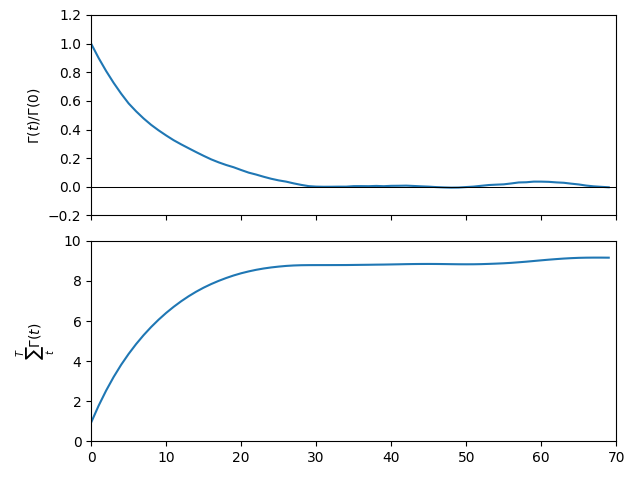

In [4]:
tmax = 70
g = Gamma_v1(data, tmax)
xax = range(tmax)

f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)

ax1.plot(xax, g/g[0])
ax1.plot([0,tmax], [0,0], '-k', lw = 0.75)
ax1.set_ylabel('$\Gamma(t)/\Gamma(0)$')
ax1.set_xlim(0,tmax)
ax1.set_ylim(-0.2,1.2)

ax2.plot(xax, np.cumsum(g))
ax2.set_ylabel('$\sum_t^T \Gamma(t)$')
ax2.set_xlim(0,tmax)
ax2.set_ylim(0,10)

f.tight_layout()

In [5]:
v = np.mean(data)
e = np.sqrt((g[0] + 2*np.sum(g[1:40]))/N)
print(f' O  = {v} +- {e}\n<O> = {mu}')

 O  = 3.0982305546381648 +- 0.05778776699977916
<O> = 3.14


<font size="3">

## The error of the error

The error of $\Gbar$ is calculated from
\begin{equation}
\cov\big( \Gbar(t) \big) = \langle \big[ \Gbar(t) - \Gamma(t) \big]^2 \rangle = \frac{1}{N^2} \sum_{i,j} \langle \dObar(i+t) \dObar(i) \dObar(j+t) \dObar(j) \rangle - \Gamma(t)^2
\label{e:err_Gbar}
\end{equation}
where we neglected the bias $C/N$, which is suppressed for large $N$.
    
A brute force estimator simply consists in defining
\begin{align}
\delta \Gbar(t,i) = \dObar(i+t) \dObar(i) - \Gbar(t)
\end{align}
and replace in all previous fomulae $\delta \Obar(i) \leftrightarrow \delta \Gbar(t,i)$ for all $t$.

In [6]:
def Gamma_v1(data, tmax):
    n = len(data)
    delta = np.zeros((2*n,))
    delta[0:n] = data - np.mean(data)
    g = np.zeros((tmax,))
    for i in range(tmax):
        g[i] = np.sum(delta[0:n-i] * delta[i:n])
        g[i] /= (n-i)
    return g
    
def Gamma_v2(data, tmax, tmax2):
    n = len(data)
    # fluctuation dO(i) = O(i) - Obar
    delta = data - np.mean(data)
    
    _g = {}
    g = np.zeros((tmax,))
    dg = np.zeros((tmax,))
    for t in range(tmax):
        # vector with all N-t estimators of Gamma(t)
        _g[t] = delta[0:n-t] * delta[t:n]
        g[t] = np.mean(_g[t])
        _dg = Gamma_v1(_g[t], tmax2)
        dg[t] = (_dg[0] + 2*np.sum(_dg[1:]))/n
    return g, dg**0.5

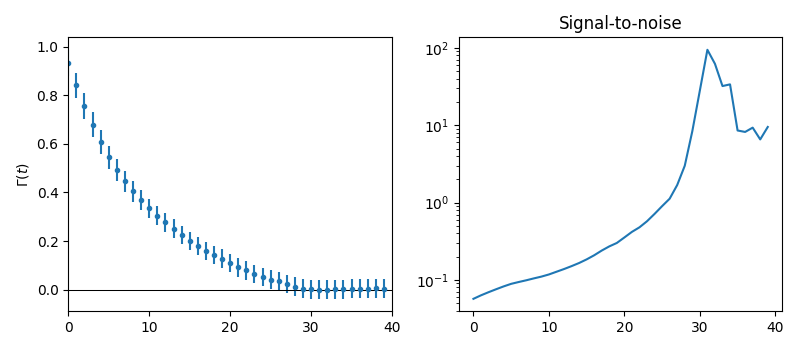

In [7]:
tmax = 40
g, dg = Gamma_v2(data, tmax, tmax)
xax = range(tmax)

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(8,3.5))

ax1.errorbar(xax, g, dg, fmt='.')
ax1.plot([0,tmax], [0,0], '-k', lw = 0.75)
ax1.set_ylabel('$\Gamma(t)$')
ax1.set_xlim(0,tmax)

ax2.set_title('Signal-to-noise')
ax2.plot(xax, abs(dg/g))
ax2.set_yscale('log')

f.tight_layout()

<font size="3">
    
$\def\Cbar{\overline C}$

A signal-to-noise problem implies that the sum $\sum_t \Gamma(t)$ defining the error requires a truncation to a window $W$, specifically
\begin{equation}
C(W) = \sum_{|t|<W} \Gamma(t)
\end{equation}
In practice we replace $\Gamma$ with $\Gbar$ and denote the estimator of $C(W)$ as $\Cbar(W)$.

How do we decide where the optimal summation window $W$ is? By eye? An algorithmic/analytic procedure would be better.
So let us insist on a closed analytic expression for the error of $\Gamma$. Using the following definition of connected expectation values
\begin{equation}
    \langle A B \rangle_\mathrm{conn} + \langle A \rangle \langle B \rangle = \langle A \ B \rangle
\end{equation}
we rewrite the first term in $\cov\big( \Gbar(t) \big)$
\begin{align}
\sum_{i,j} \langle \dObar(i+t) \dObar(i) \ \dObar(j+t) \dObar(j) \rangle = & \sum_{i,j} \langle \dObar(i+t) \dObar(i) \dObar(j+t) \dObar(j) \rangle_\mathrm{conn} \\ & + N^2 \Gamma(t)^2 + \sum_{i,j} \Gamma(i-j)^2 + \sum_{i,j} \Gamma(i+t-j)\Gamma(i-j-t)
\end{align}

**Assumption**: we neglect the connected four-point function
 - originally formulated by Madras and Sokal, further discussed by Wolff and also Virotta
 - justified by numerical checks, but not systematic i.e. not suppressed by powers in $1/N$

Using this assumption we arrive at
\begin{align}
\cov\big( \Gbar(t) \big) = \langle \big[ \Gbar(t) - \Gamma(t) \big]^2 \rangle = & \frac{1}{N^2} \sum_{i,j} \Gamma(i-j)^2 + \frac{1}{N^2} \sum_{i,j} \Gamma(i+t-j)\Gamma(i-j-t) \\ = & \frac{1}{N^2} \sum_{t'=-(N-1)}^{N-1} (N-t') \Big[ \Gamma(t')^2 + \Gamma(t+t') \Gamma(t-t') \Big] \\ \simeq & \frac{1}{N} \sum_{t'=-\infty}^{\infty} \Big[ \Gamma(t')^2 + \Gamma(t+t') \Gamma(t-t') \Big]
\end{align}
    
### Wolff's strategy

The error of $\Cbar$ can be partially inferred from the previous formulae
\begin{equation}
\cov(\Cbar(W)) = \langle [\overline C(W) - C(W) ] \rangle \simeq \frac{2W+1}{N} C^2
\end{equation}

Wolff's strategy: formulate a procedure that tries to balance the statistical error vs the systematic error due to the truncation. For the systematic error use the ansatz
\begin{equation}
\Gamma(t) \propto e^{-S_\tau t/\tau} \quad \to \quad
\frac{C(W)}{C} - 1 = e^{-S_\tau W/\tau}
\end{equation}

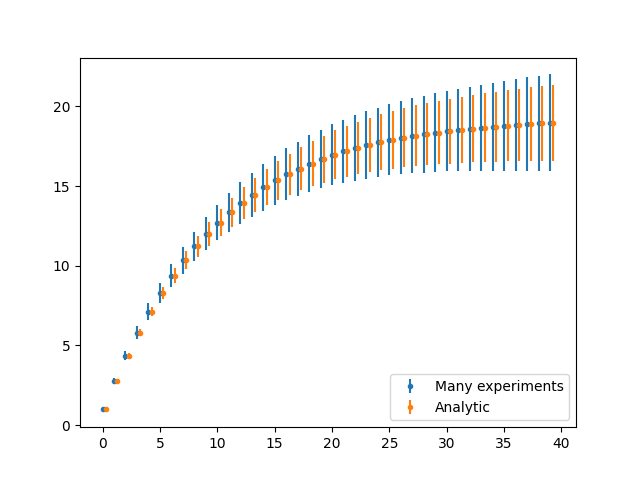

In [8]:
tmax= 40

xax = np.arange(tmax)
errs = []
for r in range(100):
    _data = rng.markov_chain(mu,cov,tau,N)
    g = Gamma_v1(_data, tmax)
    errs += [2.0*np.cumsum(g)-g[0]]
errs = np.array(errs)

plt.figure()
plt.errorbar(xax, np.mean(errs, axis=0), np.sqrt(np.var(errs, axis=0)), fmt='.', label='Many experiments')
plt.errorbar(xax+0.3, np.mean(errs, axis=0), np.mean(errs, axis=0)*np.sqrt((2*xax+1)/N), fmt='.', label='Analytic')
plt.legend(loc='lower right')

<font size="3">
    
# Exercise: Master-field analysis

Data from ensemble `64B` taken from:
   - M. Bruno et al. [Exploiting stochastic locality in lattice QCD: hadronic observables and their uncertainties
](https://arxiv.org/abs/2307.15674)

We analyse an observable $\O(\vec x) = \O(x_1, x_2, x_3)$ with $x_i \in [0,L)$ and $L/a = 64$. The number of points relevant in our analysis is $N=L^3$. At first we estimate the correlation function
    
\begin{equation}
    \Gamma(\vec x) = \langle \O(\vec x) \O(0) \rangle
\end{equation}
    
using
    
\begin{equation}
    \overline \Gamma(\vec x) = \frac{1}{N} \sum_{\vec y} \delta \Obar(\vec x + \vec y) \delta \Obar(\vec y)
\end{equation}

Then, using invariance under rotations we turn to
    
\begin{equation}
    \overline \Gamma(r) = \sum_{|\vec x|=r} \Gamma(\vec x)
\end{equation}

The determination of the error proceeds following the same procedure outlined above, namely 
    
\begin{equation}
    \sigma^2_{\Obar} = \frac{C}{N} \quad C = \sum_{r=0}^\infty \Gamma(r)
\end{equation}
    
where in practice one estimates $C$ with $\overline C$ using $\overline \Gamma$ and truncates the integral/sum up to a finite value $R$
    
\begin{equation}
    \overline C(R) = \sum_{r \leq R} \overline \Gamma(r)
\end{equation}

In [9]:
def Gamma_mfield(delta, lat, xmax):
    fft_axes = tuple(range(len(lat)))
    assert delta.size == np.prod(lat)
    
    aux0 = np.fft.rfftn(delta, s=lat, axes=fft_axes)
    aux1 = np.fft.irfftn(aux0 * aux0.conj(), s=lat, axes=fft_axes)
    
    return pyobs.core.mftools.intrsq(aux1.flatten(), np.array(lat,dtype=np.int32), xmax)/np.prod(lat)

Master-field analysis on volume (64, 64, 64)


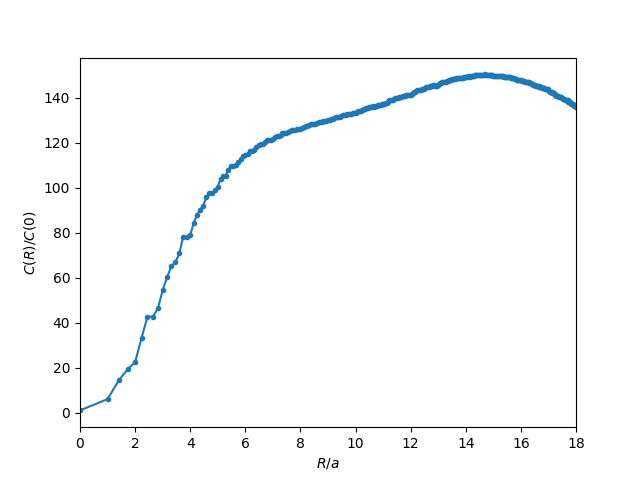

In [10]:
data = np.load('t2Et_64x64x64.npy')
lat = data.shape
print(f'Master-field analysis on volume {lat}')

delta = data - np.mean(data)

g = Gamma_mfield(delta, lat, 400)
C = np.cumsum(g)
C /= C[0]

rax = np.arange(len(g))**0.5

plt.figure()
plt.plot(rax, C, '.-')
plt.ylabel('$C(R)/C(0)$')
plt.xlabel('$R/a$')
plt.xlim(0,18)

## Exercise: perform a master-field analysis using a volume $64^2$

In [11]:
data = np.mean(np.load('t2Et_64x64x64.npy'), axis=0)
lat = data.shape
print(f'Master-field analysis on volume {lat}')

Master-field analysis on volume (64, 64)
